In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import codecs

In [53]:
doc = codecs.open('diagnosis.data','rU','UTF-16') #open for reading with "universal" type set
df = pd.read_csv(doc, sep='\t', names=['Temperature', 
                          'Occurrence of nausea', 
                          'Lumbar pain', 
                          'Urine pushing', 
                          'Micturition pains', 
                          'Burning of urethra', 
                          'Inflammation of urinary bladder', 
                          'Nephritis of renal pelvis origin'
                         ]
                 , header=None)
df.head()

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


In [54]:
df['Temperature'] = df['Temperature'].str.replace(',','.')
df

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [55]:
df['Temperature'] = df['Temperature'].astype(float)
print(df.dtypes)

Temperature                         float64
Occurrence of nausea                 object
Lumbar pain                          object
Urine pushing                        object
Micturition pains                    object
Burning of urethra                   object
Inflammation of urinary bladder      object
Nephritis of renal pelvis origin     object
dtype: object


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temperature                       120 non-null    float64
 1   Occurrence of nausea              120 non-null    object 
 2   Lumbar pain                       120 non-null    object 
 3   Urine pushing                     120 non-null    object 
 4   Micturition pains                 120 non-null    object 
 5   Burning of urethra                120 non-null    object 
 6   Inflammation of urinary bladder   120 non-null    object 
 7   Nephritis of renal pelvis origin  120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


In [57]:
df.describe(include='all')

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
count,120.000000,120,120,120,120,120,120,120
unique,NaN,2,2,2,2,2,2,2
top,NaN,no,yes,yes,no,no,no,no
freq,NaN,91,70,80,61,70,61,70
mean,38.724167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.819132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,35.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,37.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.950000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,40.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.drop(['Temperature'], axis=1, inplace=True)
df  

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,no,yes,no,no,no,no,no
1,no,no,yes,yes,yes,yes,no
2,no,yes,no,no,no,no,no
3,no,no,yes,yes,yes,yes,no
4,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...
115,no,yes,yes,no,yes,no,yes
116,no,no,no,no,no,no,no
117,yes,yes,no,yes,no,no,yes
118,no,yes,yes,no,yes,no,yes


In [59]:
df.describe()

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
count,120,120,120,120,120,120,120
unique,2,2,2,2,2,2,2
top,no,yes,yes,no,no,no,no
freq,91,70,80,61,70,61,70


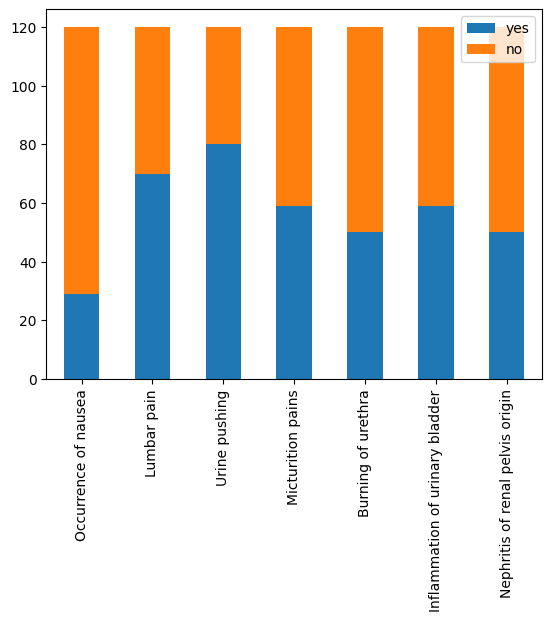

In [60]:
yes = (df == 'yes').sum()
no = (df == 'no').sum()
myplot = pd.concat([yes,no], axis=1,keys=['yes','no'])
ax=myplot.plot.bar(stacked=True)
plt.show()

In [61]:
df1 = df[df['Inflammation of urinary bladder'] == 'yes']
df1

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
1,no,no,yes,yes,yes,yes,no
3,no,no,yes,yes,yes,yes,no
6,no,no,yes,yes,yes,yes,no
8,no,no,yes,yes,yes,yes,no
9,no,no,yes,yes,yes,yes,no
10,no,no,yes,yes,yes,yes,no
13,no,no,yes,yes,yes,yes,no
16,no,no,yes,yes,yes,yes,no
17,no,no,yes,yes,yes,yes,no
18,no,no,yes,yes,yes,yes,no


In [62]:
df2 = df[df['Nephritis of renal pelvis origin'] == 'yes']
df2

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
60,no,yes,yes,no,yes,no,yes
61,no,yes,yes,no,yes,no,yes
62,no,yes,yes,no,yes,no,yes
63,no,yes,yes,no,yes,no,yes
64,no,yes,yes,no,yes,no,yes
65,no,yes,yes,no,yes,no,yes
66,no,yes,yes,no,yes,no,yes
67,no,yes,yes,no,yes,no,yes
68,no,yes,yes,no,yes,no,yes
69,no,yes,yes,no,yes,no,yes


In [63]:
df1 = df1.drop(['Inflammation of urinary bladder', 'Nephritis of renal pelvis origin'], axis=1)
df1

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra
1,no,no,yes,yes,yes
3,no,no,yes,yes,yes
6,no,no,yes,yes,yes
8,no,no,yes,yes,yes
9,no,no,yes,yes,yes
10,no,no,yes,yes,yes
13,no,no,yes,yes,yes
16,no,no,yes,yes,yes
17,no,no,yes,yes,yes
18,no,no,yes,yes,yes


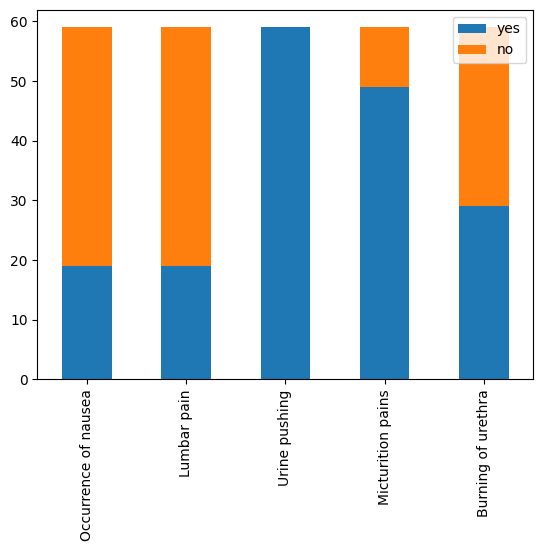

In [67]:
#Inflammation of urinary bladder
yes1 = (df1 == 'yes').sum()
no1 = (df1 == 'no').sum()
myplot1 = pd.concat([yes1,no1], axis=1,keys=['yes','no'])
ax=myplot1.plot.bar(stacked=True)
plt.show()

In [68]:
Rules = list(apriori(df1, min_support=0.2, min_confidence=0.5))